In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/stemsets/images/img100.jpg
/kaggle/input/stemsets/images/img61.jpg
/kaggle/input/stemsets/images/img44.jpg
/kaggle/input/stemsets/images/img31.jpg
/kaggle/input/stemsets/images/img11.jpg
/kaggle/input/stemsets/images/img19.jpg
/kaggle/input/stemsets/images/img18.jpg
/kaggle/input/stemsets/images/gimg134.jpg
/kaggle/input/stemsets/images/gimg143.jpg
/kaggle/input/stemsets/images/img83.jpg
/kaggle/input/stemsets/images/gimg103.jpg
/kaggle/input/stemsets/images/gimg106.jpg
/kaggle/input/stemsets/images/img74.jpg
/kaggle/input/stemsets/images/img62.jpg
/kaggle/input/stemsets/images/gimg144.jpg
/kaggle/input/stemsets/images/gimg166.jpg
/kaggle/input/stemsets/images/img34.jpg
/kaggle/input/stemsets/images/gimg120.jpg
/kaggle/input/stemsets/images/img5.jpg
/kaggle/input/stemsets/images/img54.jpg
/kaggle/input/stemsets/images/img36.jpg
/kaggle/input/stemsets/images/img57.jpg
/kaggle/input/stemsets/images/gimg185.jpg
/kaggle/input/stemsets/images/img53.jpg
/kaggle/input/stemsets/i

In [2]:
from os import listdir
from os.path import isfile, join
mypath="/kaggle/input/stemsets/images/"
file_names=[f for f in listdir(mypath) if isfile(join(mypath,f))]
print(str(len(file_names)))

200


In [3]:
import cv2
import numpy as np
import sys
import os
import shutil
good_count = 0
bad_count = 0
training_size = 70
test_size = 30
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
good_dir_train = "./kaggle/input/stemsets/train/good/"
bad_dir_train = "./kaggle/input/stemsets/train/bad/"
good_dir_val = "./kaggle/input/stemsets/validation/good/"
bad_dir_val = "./kaggle/input/stemsets/validation/bad/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(good_dir_train)
make_dir(bad_dir_train)
make_dir(good_dir_val)
make_dir(bad_dir_val)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "g":
        good_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if good_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(good_count)
            cv2.imwrite(good_dir_train + "good" + str(zeros) + str(good_count) + ".jpg", image)
        if good_count > training_size and good_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(good_count-100)
            cv2.imwrite(good_dir_val + "good" + str(zeros) + str(100-good_count) + ".jpg", image)
            
    if file_names[i][0] == "i":
        bad_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if bad_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(bad_count)
            cv2.imwrite(bad_dir_train + "bad" + str(zeros) + str(bad_count) + ".jpg", image)
        if bad_count > training_size and bad_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(bad_count-1000)
            cv2.imwrite(bad_dir_val + "bad" + str(zeros) + str(100-bad_count) + ".jpg", image)

    if good_count == training_size+test_size and bad_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


In [4]:
np.savez('good_vs_bad_training_data.npz', np.array(training_images))
np.savez('good_vs_bad_training_labels.npz', np.array(training_labels))
np.savez('good_vs_bad_test_data.npz', np.array(test_images))
np.savez('good_vs_bad_test_labels.npz', np.array(test_labels))

In [5]:
def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

In [6]:
(x_train,y_train),(x_test,y_test)=load_data_training_and_test("good_vs_bad")

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 150, 150, 3)
(140,)
(60, 150, 150, 3)
(60,)


In [8]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [9]:
import cv2
import sys
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.advanced_activations import ELU
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import optimizers
from keras.models import Sequential 
from keras.models import load_model

Using TensorFlow backend.


In [10]:
input_shape=(x_train[0].shape[0],x_train[1].shape[0],3)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [11]:
import os
import keras
batch_size=16
epochs=25

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),shuffle=True)

Train on 140 samples, validate on 60 samples
Epoch 1/25
140/140 [==============================] - 4s 28ms/step - loss: 6.8906 - accuracy: 0.5357 - val_loss: 0.6270 - val_accuracy: 0.6667
Epoch 2/25
140/140 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.6286 - val_loss: 0.6443 - val_accuracy: 0.6667
Epoch 3/25
140/140 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7214 - val_loss: 1.1280 - val_accuracy: 0.5000
Epoch 4/25
140/140 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.6643 - val_loss: 0.9409 - val_accuracy: 0.5000
Epoch 5/25
140/140 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.6143 - val_loss: 0.7768 - val_accuracy: 0.5167
Epoch 6/25
140/140 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7143 - val_loss: 0.6048 - val_accuracy: 0.6167
Epoch 7/25
140/140 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7929 - 

In [12]:
score=model.evaluate(x_test,y_test,verbose=1)
print('LOSS: ',score[0])
print('ACCURACY: ',score[1])

60/60 [==============================] - 0s 4ms/step
LOSS:  0.8659270763397217
ACCURACY:  0.6833333373069763


In [13]:
train_data_dir = './kaggle/input/stemsets/train'
validation_data_dir = './kaggle/input/stemsets/validation'

In [14]:
from keras.preprocessing.image import ImageDataGenerator
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(
      rescale = 1./255,             
      rotation_range = 30,          
      width_shift_range = 0.3,       
      height_shift_range = 0.3,      
      horizontal_flip = True,      
      fill_mode = 'nearest')   

In [15]:
input_shape = (150, 150, 3)
img_width = 150
img_height = 150
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [16]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
checkpoint=ModelCheckpoint('./checkpoint.pth', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [17]:
callbacks=[earlystopping,checkpoint]

In [18]:
input_shape=(x_train[0].shape[0],x_train[1].shape[0],3)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [19]:
import os
import keras
batch_size=16
epochs=25

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks,
          validation_data=(x_test, y_test),shuffle=True)

Train on 140 samples, validate on 60 samples
Epoch 1/25
140/140 [==============================] - 1s 4ms/step - loss: 4.6888 - accuracy: 0.5786 - val_loss: 0.8011 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ./checkpoint.pth
Epoch 2/25
140/140 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.6357 - val_loss: 0.6583 - val_accuracy: 0.6833

Epoch 00002: val_accuracy improved from 0.50000 to 0.68333, saving model to ./checkpoint.pth
Epoch 3/25
140/140 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7214 - val_loss: 0.6102 - val_accuracy: 0.6667

Epoch 00003: val_accuracy did not improve from 0.68333
Epoch 4/25
140/140 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7714 - val_loss: 0.7513 - val_accuracy: 0.5167

Epoch 00004: val_accuracy did not improve from 0.68333
Epoch 5/25
140/140 [==============================] - 0s 2ms/step - loss: 0.4647 - accurac

In [20]:
score=model.evaluate(x_test,y_test,verbose=1)
print('LOSS: ',score[0])
print('ACCURACY: ',score[1])

60/60 [==============================] - 0s 511us/step
LOSS:  0.6101635535558064
ACCURACY:  0.6666666865348816


In [21]:
model.save("./modelsaved.pth")


In [22]:
y_pred=model.predict_classes(x_test)
y_pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [23]:
y_pred[:]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [24]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model('./modelsaved.pth')





    

good 
actual :  [1]
predicted :  [1]


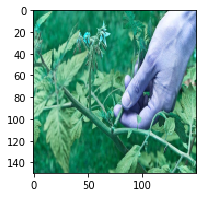

In [25]:
import cv2
from matplotlib import pyplot as plt
x=np.random.randint(0,len(x_test))
image=x_test[x]
plt.figure(figsize=(3,3))
plt.imshow(image)
if(y_pred[x]==[1]):
    print("good ")
else:
    print("bad ")
print('actual : ',y_test[x])
print('predicted : ',y_pred[x])


In [26]:
Predicted=pd.DataFrame(y_pred)
Real=pd.DataFrame(y_test)
Final=pd.concat([Predicted,Real], axis=1, join='inner')
pd.DataFrame(Final).to_csv("Submission_1.csv",index=False)